In [1]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 88.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
pip install numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install "opencv-python<4.12"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 27.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --force-reinstall scipy==1.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 50.0 MB/s eta 0:00:00:00:0100:01
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyar

In [7]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import xml.etree.ElementTree as ET
import random
import shutil
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
import albumentations as A
import uuid
from ultralytics import YOLO
import yaml
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
os.listdir('/kaggle/input/helmet-detection')

['annotations', 'images']

In [9]:
ann_path = "/kaggle/input/helmet-detection/annotations"
img_path = "/kaggle/input/helmet-detection/images"

xml_files = os.listdir(ann_path)
img_files = os.listdir(img_path)

print("Số XML:", len(xml_files))
print("Số ảnh:", len(img_files))


Số XML: 764
Số ảnh: 764


In [10]:
ANN_DIR = "/kaggle/input/helmet-detection/annotations"

sample_xml = os.path.join(ANN_DIR, sorted(os.listdir(ANN_DIR))[0])
print("Sample XML:", sample_xml)

tree = ET.parse(sample_xml)
root = tree.getroot()

for obj in root.findall("object"):
    name = obj.find("name").text.strip()
    bbox = obj.find("bndbox")
    xmin = bbox.find("xmin").text; ymin = bbox.find("ymin").text
    xmax = bbox.find("xmax").text; ymax = bbox.find("ymax").text
    print("Label:", name, "BBox:", xmin, ymin, xmax, ymax)

Sample XML: /kaggle/input/helmet-detection/annotations/BikesHelmets0.xml
Label: With Helmet BBox: 29 105 82 160
Label: With Helmet BBox: 122 66 193 154
Label: With Helmet BBox: 201 43 246 98
Label: With Helmet BBox: 307 17 371 107


Image path: /kaggle/input/helmet-detection/images/BikesHelmets0.png


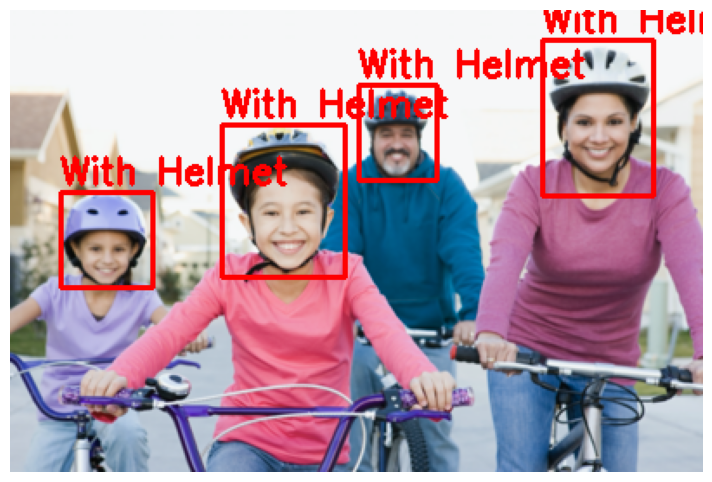

In [11]:
ANN_DIR = "/kaggle/input/helmet-detection/annotations"
IMG_DIR = "/kaggle/input/helmet-detection/images"

xml_file = sorted(os.listdir(ANN_DIR))[0]
img_file = xml_file.replace(".xml", ".png")  # nếu .jpg thì chỉnh lại
img_path = os.path.join(IMG_DIR, img_file)
print("Image path:", img_path)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

tree = ET.parse(os.path.join(ANN_DIR, xml_file))
root = tree.getroot()

for obj in root.findall("object"):
    name = obj.find("name").text.strip()
    bbox = obj.find("bndbox")
    xmin = int(float(bbox.find("xmin").text))
    ymin = int(float(bbox.find("ymin").text))
    xmax = int(float(bbox.find("xmax").text))
    ymax = int(float(bbox.find("ymax").text))
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255,0,0), 2)
    cv2.putText(img, name, (xmin, max(ymin-5,0)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)

plt.figure(figsize=(10,6)); plt.imshow(img); plt.axis("off"); plt.show()

In [12]:
ANN_DIR = "/kaggle/input/helmet-detection/annotations"

counts = {}
for f in os.listdir(ANN_DIR):
    if not f.lower().endswith(".xml"): continue
    tree = ET.parse(os.path.join(ANN_DIR,f))
    root = tree.getroot()
    for obj in root.findall("object"):
        name = obj.find("name").text.strip()
        counts[name] = counts.get(name,0) + 1

print("BBox counts per label:", counts)

BBox counts per label: {'Without Helmet': 489, 'With Helmet': 962}


In [13]:
ANN_DIR = "/kaggle/input/helmet-detection/annotations"
IMG_DIR = "/kaggle/input/helmet-detection/images"
OUT_ROOT = "/kaggle/working/dataset"
os.makedirs(os.path.join(OUT_ROOT,"images"), exist_ok=True)
os.makedirs(os.path.join(OUT_ROOT,"labels"), exist_ok=True)

# mapping chính xác
class_map = {"With Helmet":0, "Without Helmet":1}

# pick one xml
xml_file = sorted([f for f in os.listdir(ANN_DIR) if f.endswith(".xml")])[0]
xml_path = os.path.join(ANN_DIR, xml_file)
tree = ET.parse(xml_path); root = tree.getroot()

# image filename
fname_tag = root.find("filename")
if fname_tag is not None and fname_tag.text:
    img_fname = fname_tag.text
else:
    img_fname = xml_file.replace(".xml",".png")  # fallback

img_path = os.path.join(IMG_DIR, img_fname)
print("Using image:", img_fname)

# get image size
with Image.open(img_path) as im:
    w,h = im.size

# write yolo label
txt_out = os.path.join(OUT_ROOT,"labels", xml_file.replace(".xml",".txt"))
with open(txt_out,"w") as fw:
    for obj in root.findall("object"):
        nm = obj.find("name").text.strip()
        if nm not in class_map: 
            continue
        cls = class_map[nm]
        b = obj.find("bndbox")
        xmin = float(b.find("xmin").text); ymin = float(b.find("ymin").text)
        xmax = float(b.find("xmax").text); ymax = float(b.find("ymax").text)
        x_c = (xmin + xmax) / 2.0 / w
        y_c = (ymin + ymax) / 2.0 / h
        bw = (xmax - xmin) / w
        bh = (ymax - ymin) / h
        fw.write(f"{cls} {x_c:.6f} {y_c:.6f} {bw:.6f} {bh:.6f}\n")

# copy image
shutil.copy(img_path, os.path.join(OUT_ROOT,"images", img_fname))
print("Wrote:", txt_out)
print("Copied image to:", os.path.join(OUT_ROOT,"images", img_fname))

# show the content of txt
with open(txt_out) as f: print("Label file content:\\n", f.read())

Using image: BikesHelmets0.png
Wrote: /kaggle/working/dataset/labels/BikesHelmets0.txt
Copied image to: /kaggle/working/dataset/images/BikesHelmets0.png
Label file content:\n 0 0.138750 0.496255 0.132500 0.205993
0 0.393750 0.411985 0.177500 0.329588
0 0.558750 0.264045 0.112500 0.205993
0 0.847500 0.232210 0.160000 0.337079



In [14]:
ANN_DIR = "/kaggle/input/helmet-detection/annotations"
IMG_DIR = "/kaggle/input/helmet-detection/images"
OUT_ROOT = "/kaggle/working/dataset"
IMG_OUT = os.path.join(OUT_ROOT,"images")
LBL_OUT = os.path.join(OUT_ROOT,"labels")
os.makedirs(IMG_OUT, exist_ok=True)
os.makedirs(LBL_OUT, exist_ok=True)

class_map = {"With Helmet":0, "Without Helmet":1}

skipped = 0
converted = 0
for xml_file in sorted(os.listdir(ANN_DIR)):
    if not xml_file.lower().endswith(".xml"): continue
    xml_path = os.path.join(ANN_DIR, xml_file)
    tree = ET.parse(xml_path); root = tree.getroot()
    # filename
    fn_tag = root.find("filename")
    if fn_tag is not None and fn_tag.text:
        img_fname = fn_tag.text
    else:
        img_fname = xml_file.replace(".xml",".png")
    # resolve actual extension if needed
    img_path = os.path.join(IMG_DIR, img_fname)
    if not os.path.exists(img_path):
        alt = img_fname.rsplit(".",1)[0] + ".jpg"
        if os.path.exists(os.path.join(IMG_DIR, alt)):
            img_fname = alt
            img_path = os.path.join(IMG_DIR, img_fname)
        else:
            skipped += 1
            continue
    with Image.open(img_path) as im:
        w,h = im.size

    objs = []
    for obj in root.findall("object"):
        nm = obj.find("name").text.strip()
        if nm not in class_map: 
            continue
        b = obj.find("bndbox")
        xmin = float(b.find("xmin").text); ymin = float(b.find("ymin").text)
        xmax = float(b.find("xmax").text); ymax = float(b.find("ymax").text)
        x_c = (xmin + xmax) / 2.0 / w
        y_c = (ymin + ymax) / 2.0 / h
        bw = (xmax - xmin) / w
        bh = (ymax - ymin) / h
        objs.append((class_map[nm], x_c, y_c, bw, bh))

    if len(objs) == 0:
        skipped += 1
        continue

    # write txt
    txt_path = os.path.join(LBL_OUT, xml_file.replace(".xml",".txt"))
    with open(txt_path, "w") as fw:
        for o in objs:
            fw.write(f"{o[0]} {o[1]:.6f} {o[2]:.6f} {o[3]:.6f} {o[4]:.6f}\\n")

    # copy image
    shutil.copy(img_path, os.path.join(IMG_OUT, img_fname))
    converted += 1

print("Converted images:", converted, "Skipped (no objs/missing img):", skipped)

Converted images: 761 Skipped (no objs/missing img): 3


In [16]:
IMG_OUT = "/kaggle/working/dataset/images"
LBL_OUT = "/kaggle/working/dataset/labels"

records = []
for img in sorted(os.listdir(IMG_OUT)):
    txt = os.path.splitext(img)[0] + ".txt"
    txtp = os.path.join(LBL_OUT, txt)
    with_count = 0; without_count = 0; total = 0
    with open(txtp) as f:
        for line in f:
            parts = line.strip().split()
            if not parts: continue
            cls = int(parts[0])
            total += 1
            if cls == 0: with_count += 1
            elif cls == 1: without_count += 1
    records.append({
        "image": img,
        "with_count": with_count,
        "without_count": without_count,
        "total": total,
        "has_with": 1 if with_count>0 else 0,
        "has_without": 1 if without_count>0 else 0
    })

df = pd.DataFrame(records)
df['stratify_key'] = df['has_with'].astype(str) + "_" + df['has_without'].astype(str)
print(df['stratify_key'].value_counts())
df.head()

stratify_key
1_0    533
0_1    228
Name: count, dtype: int64


,image,with_count,without_count,total,has_with,has_without,stratify_key
0,BikesHelmets0.png,1,0,1,1,0,1_0
1,BikesHelmets1.png,1,0,1,1,0,1_0
2,BikesHelmets10.png,0,1,1,0,1,0_1
3,BikesHelmets100.png,1,0,1,1,0,1_0
4,BikesHelmets101.png,1,0,1,1,0,1_0


In [17]:
seed = 42
trainval, test = train_test_split(df, test_size=0.10, random_state=seed, stratify=df['stratify_key'])
val_rel = 0.10 / 0.90
train, val = train_test_split(trainval, test_size=val_rel, random_state=seed, stratify=trainval['stratify_key'])

print("Sizes: total", len(df), "train", len(train), "val", len(val), "test", len(test))

# make folders
for split in ["train","val","test"]:
    os.makedirs(os.path.join(OUT_ROOT, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(OUT_ROOT, split, "labels"), exist_ok=True)

def move_split(df_split, split_name):
    for _, r in df_split.iterrows():
        img = r['image']
        txt = os.path.splitext(img)[0] + ".txt"
        shutil.move(os.path.join(OUT_ROOT,"images",img), os.path.join(OUT_ROOT, split_name, "images", img))
        shutil.move(os.path.join(OUT_ROOT,"labels",txt), os.path.join(OUT_ROOT, split_name, "labels", txt))

move_split(train, "train")
move_split(val, "val")
move_split(test, "test")

print("Files moved into train/val/test")

Sizes: total 761 train 608 val 76 test 77
Files moved into train/val/test


Train boxes (With, Without): (426, 182)
Val   boxes (With, Without): (53, 23)
Test  boxes (With, Without): (54, 23)


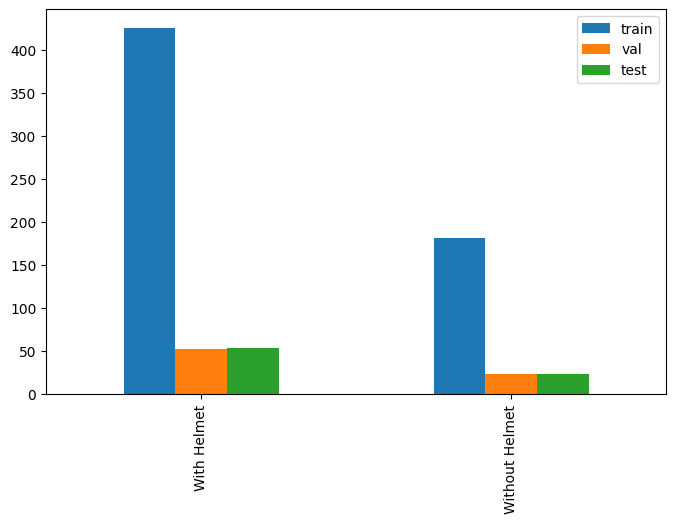

In [18]:
def count_bboxes(lbl_folder):
    c0=c1=0
    for f in os.listdir(lbl_folder):
        if not f.endswith(".txt"): continue
        with open(os.path.join(lbl_folder,f)) as fh:
            for line in fh:
                if line.strip():
                    cls = int(line.split()[0])
                    if cls==0: c0+=1
                    elif cls==1: c1+=1
    return c0,c1

train_c = count_bboxes(os.path.join(OUT_ROOT,"train","labels"))
val_c   = count_bboxes(os.path.join(OUT_ROOT,"val","labels"))
test_c  = count_bboxes(os.path.join(OUT_ROOT,"test","labels"))

print("Train boxes (With, Without):", train_c)
print("Val   boxes (With, Without):", val_c)
print("Test  boxes (With, Without):", test_c)

import pandas as pd
df_plot = pd.DataFrame({
    "train": list(train_c),
    "val": list(val_c),
    "test": list(test_c)
}, index=["With Helmet","Without Helmet"])
df_plot.plot(kind="bar", figsize=(8,5)); plt.show()

In [19]:
TRAIN_IMG = "/kaggle/working/dataset/train/images"
TRAIN_LBL = "/kaggle/working/dataset/train/labels"

weak_images = []

for lbl_file in sorted(os.listdir(TRAIN_LBL)):
    if not lbl_file.endswith(".txt"):
        continue
    txt_path = os.path.join(TRAIN_LBL, lbl_file)
    has_weak = False

    with open(txt_path) as f:
        for line in f:
            if line.strip():
                cls = int(line.split()[0])
                if cls == 1: 
                    has_weak = True
                    break

    if has_weak:
        img_name = lbl_file.replace(".txt", ".jpg")
        png_name = lbl_file.replace(".txt", ".png")

        # resolve jpg/png
        if os.path.exists(os.path.join(TRAIN_IMG, img_name)):
            weak_images.append(img_name)
        elif os.path.exists(os.path.join(TRAIN_IMG, png_name)):
            weak_images.append(png_name)

print("Total weak-class images in train:", len(weak_images))
weak_images[:10]

Total weak-class images in train: 182


['BikesHelmets10.png',
 'BikesHelmets110.png',
 'BikesHelmets111.png',
 'BikesHelmets112.png',
 'BikesHelmets119.png',
 'BikesHelmets128.png',
 'BikesHelmets130.png',
 'BikesHelmets133.png',
 'BikesHelmets137.png',
 'BikesHelmets140.png']

In [20]:
current_weak = 182    # bbox hiện tại trong train
target_weak = 360     # mục tiêu cân bằng (~360)
need_extra = target_weak - current_weak

print("Current weak bbox :", current_weak)
print("Target weak bbox  :", target_weak)
print("Need extra bbox   :", need_extra)

Current weak bbox : 182
Target weak bbox  : 360
Need extra bbox   : 178


In [21]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.4),
    A.Affine(translate_percent=0.05, scale=(0.9, 1.1), rotate=(-10, 10), p=0.5, border_mode=0),
    A.GaussianBlur(p=0.2)
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

In [23]:
TRAIN_IMG = "/kaggle/working/dataset/train/images"
TRAIN_LBL = "/kaggle/working/dataset/train/labels"

def save_yolo_label(txt_path, bboxes, labels):
    with open(txt_path, "w") as f:
        for cls, (x, y, w, h) in zip(labels, bboxes):
            f.write(f"{cls} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")

In [24]:
def load_yolo_label(txt_path):
    """
    Đọc file YOLO label, xử lý cả trường hợp:
    - Có \\n thay vì xuống dòng thật
    - Nhiều bbox trên cùng một dòng
    """
    bboxes = []
    labels = []
    
    with open(txt_path, 'r') as f:
        content = f.read()
    
    # Thay thế \\n literal thành xuống dòng thật
    content = content.replace('\\n', '\n')
    
    # Split thành các dòng
    lines = content.strip().split('\n')
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
        
        # Split thành các phần tử
        parts = line.split()
        
        # Xử lý từng bbox (mỗi bbox có 5 giá trị: class x y w h)
        i = 0
        while i + 4 < len(parts):
            try:
                cls = int(parts[i])
                x = float(parts[i + 1])
                y = float(parts[i + 2])
                w = float(parts[i + 3])
                h = float(parts[i + 4])
                
                # Validate bbox values
                if 0 <= x <= 1 and 0 <= y <= 1 and 0 < w <= 1 and 0 < h <= 1:
                    bboxes.append([x, y, w, h])
                    labels.append(cls)
                    i += 5
                else:
                    # Skip invalid bbox
                    i += 5
                    
            except (ValueError, IndexError):
                # Skip nếu không parse được
                i += 1
                continue
    
    return bboxes, labels

def save_yolo_label(txt_path, bboxes, labels):
    """Lưu file YOLO label đúng format"""
    with open(txt_path, "w") as f:
        for cls, (x, y, w, h) in zip(labels, bboxes):
            f.write(f"{cls} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")

In [25]:
augmented_count = 0
total_weak_boxes_added = 0

# Tính số lần cần augment mỗi ảnh
num_augments_per_image = max(1, need_extra // len(weak_images))

print(f"\nBắt đầu augmentation...")
print(f"Số augmentation mỗi ảnh: {num_augments_per_image}")

for idx, img_file in enumerate(weak_images):
    # Đọc ảnh
    img_path = os.path.join(TRAIN_IMG, img_file)
    
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        continue
    
    image = cv2.imread(img_path)
    if image is None:
        print(f"Cannot read image: {img_path}")
        continue
        
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Đọc label
    base_name = os.path.splitext(img_file)[0]
    lbl_path = os.path.join(TRAIN_LBL, base_name + ".txt")
    
    if not os.path.exists(lbl_path):
        print(f"Label not found: {lbl_path}")
        continue
    
    bboxes, labels = load_yolo_label(lbl_path)
    
    if len(bboxes) == 0:
        print(f"No valid bboxes in {lbl_path}")
        continue
    
    # Đếm số bbox class 1 trong ảnh gốc
    weak_boxes_in_image = sum(1 for lbl in labels if lbl == 1)
    
    if weak_boxes_in_image == 0:
        continue
    
    # Tạo augmented images
    for i in range(num_augments_per_image):
        if total_weak_boxes_added >= need_extra:
            break
            
        try:
            # Apply augmentation
            augmented = transform(image=image, bboxes=bboxes, class_labels=labels)
            aug_image = augmented['image']
            aug_bboxes = augmented['bboxes']
            aug_labels = augmented['class_labels']
            
            if len(aug_bboxes) == 0:
                continue
            
            # Tạo tên file mới
            aug_img_name = f"{base_name}_aug{i}.jpg"
            aug_lbl_name = f"{base_name}_aug{i}.txt"
            
            # Lưu ảnh augmented
            aug_img_path = os.path.join(TRAIN_IMG, aug_img_name)
            cv2.imwrite(aug_img_path, cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR))
            
            # Lưu label augmented
            aug_lbl_path = os.path.join(TRAIN_LBL, aug_lbl_name)
            save_yolo_label(aug_lbl_path, aug_bboxes, aug_labels)
            
            augmented_count += 1
            total_weak_boxes_added += weak_boxes_in_image
            
            # Progress report
            if augmented_count % 10 == 0:
                print(f"Progress: {augmented_count} images created, ~{total_weak_boxes_added} bbox added")
            
        except Exception as e:
            print(f"Error augmenting {img_file}: {e}")
            continue
    
    if total_weak_boxes_added >= need_extra:
        print(f"Đã đủ số bbox cần thiết!")
        break

print(f"\n✓ Đã tạo {augmented_count} ảnh augmented")
print(f"✓ Ước tính thêm ~{total_weak_boxes_added} bbox class 'Without Helmet'")


Bắt đầu augmentation...
Số augmentation mỗi ảnh: 1
Progress: 10 images created, ~19 bbox added
Progress: 20 images created, ~35 bbox added
Progress: 30 images created, ~48 bbox added
Error augmenting BikesHelmets256.png: Expected y_min for bbox [      0.605 -5.0664e-07       0.725     0.19915           1] to be in the range [0.0, 1.0], got -5.066394805908203e-07.
Progress: 40 images created, ~64 bbox added
Progress: 50 images created, ~89 bbox added
Progress: 60 images created, ~108 bbox added
Progress: 70 images created, ~133 bbox added
Progress: 80 images created, ~154 bbox added
Progress: 90 images created, ~169 bbox added
Đã đủ số bbox cần thiết!

✓ Đã tạo 97 ảnh augmented
✓ Ước tính thêm ~182 bbox class 'Without Helmet'


In [26]:
def count_bboxes(lbl_folder):
    """Đếm bbox với xử lý \\n"""
    with_h, without_h = 0, 0
    for f in os.listdir(lbl_folder):
        if not f.endswith(".txt"):
            continue
        lbl_path = os.path.join(lbl_folder, f)
        
        with open(lbl_path, 'r') as fh:
            content = fh.read()
        
        # Thay thế \\n literal
        content = content.replace('\\n', '\n')
        lines = content.strip().split('\n')
        
        for line in lines:
            line = line.strip()
            if not line:
                continue
            
            parts = line.split()
            i = 0
            while i + 4 < len(parts):
                try:
                    cls = int(parts[i])
                    if cls == 0:
                        with_h += 1
                    elif cls == 1:
                        without_h += 1
                    i += 5
                except:
                    i += 1
                    continue
                    
    return with_h, without_h

print(f"Đang đếm lại bbox...")
new_train_counts = count_bboxes(TRAIN_LBL)
print(f"\n{'='*60}")
print(f"✓ NEW TRAIN bbox counts (With, Without): {new_train_counts}")
if new_train_counts[1] > 0:
    print(f"✓ Tỷ lệ cân bằng: {new_train_counts[0]/new_train_counts[1]:.2f}:1")
print(f"{'='*60}")

Đang đếm lại bbox...

✓ NEW TRAIN bbox counts (With, Without): (773, 399)
✓ Tỷ lệ cân bằng: 1.94:1


In [27]:
yaml_path = "/kaggle/working/dataset/helmet.yaml"
with open(yaml_path,"w") as f:
    f.write(f"train: /kaggle/working/dataset/train/images\n")
    f.write(f"val:   /kaggle/working/dataset/val/images\n")
    f.write(f"test:  /kaggle/working/dataset/test/images\n\n")
    f.write("names:\n")
    f.write("  0: 'With Helmet'\n")
    f.write("  1: 'Without Helmet'\n")
print("Created", yaml_path)

Created /kaggle/working/dataset/helmet.yaml


In [ ]:
print("\n📁 Dataset Structure Check:")
print("=" * 60)

for split in ['train', 'val', 'test']:
    img_dir = f'/kaggle/working/dataset/{split}/images'
    lbl_dir = f'/kaggle/working/dataset/{split}/labels'
    
    if os.path.exists(img_dir):
        num_images = len([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png'))])
        num_labels = len([f for f in os.listdir(lbl_dir) if f.endswith('.txt')])
        print(f"{split.upper():>6}: {num_images} images, {num_labels} labels")
    else:
        print(f"{split.upper():>6}: Not found")

print("=" * 60)

In [28]:
print("\n🤖 Loading YOLOv8 Model...")
model = YOLO('yolov8n.pt')
print("✓ Model loaded: YOLOv8n")


🤖 Loading YOLOv8 Model...
✓ Model loaded: YOLOv8n


In [29]:
training_config = {
    'data': yaml_path,
    'epochs': 50,              # Số epoch (có thể tăng lên 100-150 nếu cần)
    'imgsz': 640,              # Kích thước ảnh input
    'batch': 16,               # Batch size (giảm xuống 8 nếu GPU nhỏ)
    'name': 'helmet_detector', # Tên experiment
    'project': 'runs/detect',  # Thư mục lưu kết quả
    
    # Augmentation (để compensate imbalance)
    'hsv_h': 0.015,           # Hue augmentation
    'hsv_s': 0.7,             # Saturation
    'hsv_v': 0.4,             # Value/Brightness
    'degrees': 15,            # Rotation
    'translate': 0.1,         # Translation
    'scale': 0.5,             # Scaling
    'shear': 5,               # Shearing
    'perspective': 0.0005,    # Perspective transform
    'flipud': 0.0,            # Vertical flip
    'fliplr': 0.5,            # Horizontal flip
    'mosaic': 1.0,            # Mosaic augmentation
    'mixup': 0.1,             # Mixup augmentation
    
    # Training parameters
    'patience': 15,            # Early stopping patience
    'save': True,              # Save checkpoints
    'save_period': 10,         # Save every N epochs
    'cache': False,            # Cache images (True nếu RAM đủ)
    'device': 0,               # GPU device (0 = first GPU, cpu = CPU)
    'workers': 4,              # Số workers cho dataloader
    'optimizer': 'SGD',        # SGD hoặc Adam
    'lr0': 0.01,              # Initial learning rate
    'lrf': 0.01,              # Final learning rate (lr0 * lrf)
    'momentum': 0.937,         # SGD momentum
    'weight_decay': 0.0005,    # Weight decay
    'warmup_epochs': 3.0,      # Warmup epochs
    'warmup_momentum': 0.8,    # Warmup initial momentum
    'box': 7.5,               # Box loss gain
    'cls': 0.5,               # Classification loss gain
    'dfl': 1.5,               # DFL loss gain
    
    # Validation
    'val': True,              # Validate during training
    'plots': True,            # Save training plots
    'verbose': True,          # Verbose output
}

for key, value in training_config.items():
    print(f"  {key:20s}: {value}")

  data                : /kaggle/working/dataset/helmet.yaml
  epochs              : 50
  imgsz               : 640
  batch               : 16
  name                : helmet_detector
  project             : runs/detect
  hsv_h               : 0.015
  hsv_s               : 0.7
  hsv_v               : 0.4
  degrees             : 15
  translate           : 0.1
  scale               : 0.5
  shear               : 5
  perspective         : 0.0005
  flipud              : 0.0
  fliplr              : 0.5
  mosaic              : 1.0
  mixup               : 0.1
  patience            : 15
  save                : True
  save_period         : 10
  cache               : False
  device              : 0
  workers             : 4
  optimizer           : SGD
  lr0                 : 0.01
  lrf                 : 0.01
  momentum            : 0.937
  weight_decay        : 0.0005
  warmup_epochs       : 3.0
  warmup_momentum     : 0.8
  box                 : 7.5
  cls                 : 0.5
  dfl               

In [31]:
import glob
def fix_label_file(label_path):
    try:
        with open(label_path, 'r') as f:
            content = f.read()
        
        # Thay thế \\n literal thành xuống dòng thật
        content = content.replace('\\n', '\n')
        
        # Parse và validate
        lines = content.strip().split('\n')
        fixed_lines = []
        
        for line in lines:
            line = line.strip()
            if not line:
                continue
            
            parts = line.split()
            
            # Xử lý từng bbox (5 values: class x y w h)
            i = 0
            while i + 4 < len(parts):
                try:
                    cls = int(parts[i])
                    x = float(parts[i + 1])
                    y = float(parts[i + 2])
                    w = float(parts[i + 3])
                    h = float(parts[i + 4])
                    
                    # Validate YOLO format (0-1 range)
                    if 0 <= x <= 1 and 0 <= y <= 1 and 0 < w <= 1 and 0 < h <= 1 and cls in [0, 1]:
                        fixed_lines.append(f"{cls} {x:.6f} {y:.6f} {w:.6f} {h:.6f}")
                    
                    i += 5
                except (ValueError, IndexError):
                    # Skip invalid data
                    i += 1
        
        # Ghi lại file nếu có data hợp lệ
        if fixed_lines:
            with open(label_path, 'w') as f:
                f.write('\n'.join(fixed_lines) + '\n')
            return True, len(fixed_lines)
        else:
            return False, 0
            
    except Exception as e:
        return False, 0

# Xử lý tất cả các splits
splits = ['train', 'val', 'test']
total_fixed = 0
total_failed = 0
total_bboxes = 0

for split in splits:
    label_dir = f'/kaggle/working/dataset/{split}/labels'
    
    if not os.path.exists(label_dir):
        print(f"\n⚠️  {split.upper()} labels not found, skipping...")
        continue
    
    label_files = glob.glob(os.path.join(label_dir, '*.txt'))
    
    print(f"\n📁 Processing {split.upper()}: {len(label_files)} files")
    print("-" * 70)
    
    fixed_count = 0
    failed_count = 0
    split_bboxes = 0
    
    for label_file in label_files:
        success, num_bboxes = fix_label_file(label_file)
        
        if success:
            fixed_count += 1
            split_bboxes += num_bboxes
        else:
            failed_count += 1
    
    print(f"  ✓ Fixed: {fixed_count} files")
    print(f"  ✗ Failed: {failed_count} files")
    print(f"  📊 Total bboxes: {split_bboxes}")
    
    total_fixed += fixed_count
    total_failed += failed_count
    total_bboxes += split_bboxes

print(f"  ✓ Total files fixed: {total_fixed}")
print(f"  ✗ Total files failed: {total_failed}")
print(f"  📊 Total bboxes: {total_bboxes}")

# Xóa cache cũ để YOLO tạo lại
print("\n🗑️  Removing old cache files...")
for split in splits:
    cache_file = f'/kaggle/working/dataset/{split}/labels.cache'
    if os.path.exists(cache_file):
        os.remove(cache_file)
        print(f"  ✓ Removed: {cache_file}")

🔧 FIXING ALL LABEL FILES

📁 Processing TRAIN: 705 files
----------------------------------------------------------------------
  ✓ Fixed: 606 files
  ✗ Failed: 99 files
  📊 Total bboxes: 1159

📁 Processing VAL: 76 files
----------------------------------------------------------------------
  ✓ Fixed: 74 files
  ✗ Failed: 2 files
  📊 Total bboxes: 141

📁 Processing TEST: 77 files
----------------------------------------------------------------------
  ✓ Fixed: 76 files
  ✗ Failed: 1 files
  📊 Total bboxes: 134

📊 SUMMARY
  ✓ Total files fixed: 756
  ✗ Total files failed: 102
  📊 Total bboxes: 1434

🗑️  Removing old cache files...
  ✓ Removed: /kaggle/working/dataset/train/labels.cache
  ✓ Removed: /kaggle/working/dataset/val/labels.cache


In [32]:
results = model.train(**training_config)

Ultralytics 8.3.228 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/dataset/helmet.yaml, degrees=15, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_detector2, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=15, perspective=0.0005, plo

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         74        141      0.769      0.829      0.888      0.524
           With Helmet         53         94      0.747      0.936      0.954      0.571
        Without Helmet         26         47       0.79      0.722      0.822      0.478
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /kaggle/working/runs/detect/helmet_detector2


In [34]:
print(f"\n📈 Key Metrics:")
print(f"  mAP50     : {metrics.box.map50:.4f}")
print(f"  mAP50-95  : {metrics.box.map:.4f}")
print(f"  Precision : {metrics.box.mp:.4f}")
print(f"  Recall    : {metrics.box.mr:.4f}")

# Per-class metrics
if hasattr(metrics.box, 'maps'):
    print(f"\n📊 Per-Class mAP50:")
    print(f"  With Helmet    : {metrics.box.maps[0]:.4f}")
    print(f"  Without Helmet : {metrics.box.maps[1]:.4f}")


📈 Key Metrics:
  mAP50     : 0.8886
  mAP50-95  : 0.5268
  Precision : 0.7610
  Recall    : 0.8320

📊 Per-Class mAP50:
  With Helmet    : 0.5755
  Without Helmet : 0.4781


In [48]:
best_model_path = '/kaggle/working/runs/detect/helmet_detector2/weights/best.pt'

✓ Đang tải model từ: /kaggle/working/runs/detect/helmet_detector2/weights/best.pt

image 1/1 /kaggle/working/dataset/test/images/BikesHelmets97.png: 480x640 8 With Helmets, 16.6ms
Speed: 1.8ms preprocess, 16.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
✓ Inference result saved: test_result.jpg


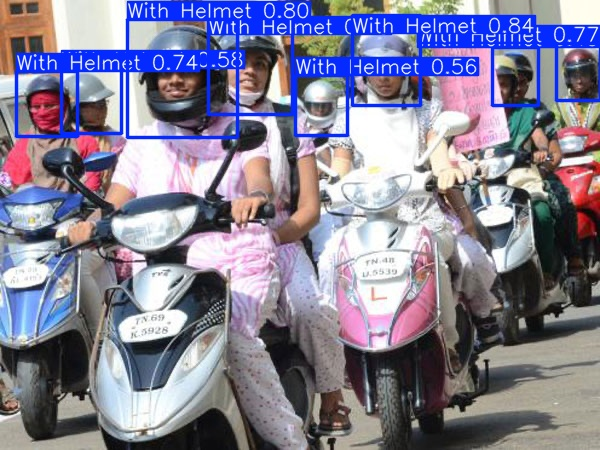

In [49]:
if not os.path.exists(best_model_path):
    print(f"LỖI: Không tìm thấy model tại {best_model_path}")
else:
    print(f"✓ Đang tải model từ: {best_model_path}")
    best_model = YOLO(best_model_path) # Tải model

    test_image = None
    test_dir = '/kaggle/working/dataset/test/images'
    
    if os.path.exists(test_dir):
        test_images = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png'))]
        if test_images:
            test_image = os.path.join(test_dir, test_images[0]) # Lấy ảnh đầu tiên

    if test_image:
        results = best_model(test_image)
        results[0].save(filename='test_result.jpg')
        print(f"✓ Inference result saved: test_result.jpg")
        
        # 5. HIỂN THỊ KẾT QUẢ
        display(Image('test_result.jpg', width=600)) # Thêm width để ảnh dễ nhìn hơn
    else:
        print("⚠️  No test images found in {test_dir}")